Let’s use each of these pvlib modeling paradigms to calculate the yearly energy yield for a given hardware configuration at a handful of sites listed below.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
import numpy as np

In [54]:
coordinates = [(30, -110, 'Tucson', 700, 'Etc/GMT+7'),
               (35, -105, 'Albuquerque', 1500, 'Etc/GMT+7'),
               (40, -120, 'San Francisco', 10, 'Etc/GMT+8'),
               (50, 10, 'Berlin', 34, 'Etc/GMT-1')]

In [113]:
naive_times = pd.DatetimeIndex(start='2016', end='2017', freq='1h')

In [120]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Silevo_Triex_U300_Black__2014_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

In [121]:
sandia_modules

,Advent_Solar_AS160___2006_,Advent_Solar_Ventura_210___2008_,Advent_Solar_Ventura_215___2009_,Aleo_S03_160__2007__E__,Aleo_S03_165__2007__E__,Aleo_S16_165__2007__E__,Aleo_S16_170__2007__E__,Aleo_S16_175__2007__E__,Aleo_S16_180__2007__E__,Aleo_S16_185__2007__E__,...,Panasonic_VBHN235SA06B__2013_,Trina_TSM_240PA05__2013_,Hanwha_HSL60P6_PA_4_250T__2013_,Suniva_OPT300_72_4_100__2013_,Canadian_Solar_CS6X_300M__2013_,LG_LG290N1C_G3__2013_,Sharp_NDQ235F4__2013_,Solar_Frontier_SF_160S__2013_,SolarWorld_Sunmodule_250_Poly__2013_,Silevo_Triex_U300_Black__2014_
Vintage,2006,2008,2009,2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014
Area,1.312,1.646,1.646,1.28,1.28,1.378,1.378,1.378,1.378,1.378,...,1.26,1.63,1.65,1.93,1.91,1.64,1.56,1.22,1.68,1.68
Material,mc-Si,mc-Si,mc-Si,c-Si,c-Si,mc-Si,mc-Si,mc-Si,mc-Si,mc-Si,...,a-Si / mono-Si,mc-Si,mc-Si,c-Si,c-Si,c-Si,mc-Si,CIS,mc-Si,c-Si
Cells_in_Series,72,60,60,72,72,50,50,50,50,50,...,72,60,60,72,72,60,60,172,60,96
Parallel_Strings,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Isco,5.564,8.34,8.49,5.1,5.2,7.9,7.95,8.1,8.15,8.2,...,5.8738,8.8449,8.5935,8.5753,8.6388,9.8525,8.6739,2.0259,8.3768,5.771
Voco,42.832,35.31,35.92,43.5,43.6,30,30.1,30.2,30.3,30.5,...,52.0042,36.8926,36.8075,44.2921,43.5918,39.6117,36.8276,112.505,36.3806,68.5983
Impo,5.028,7.49,7.74,4.55,4.65,7.08,7.23,7.38,7.53,7.67,...,5.5383,8.2955,8.0822,7.963,8.1359,9.2473,8.1243,1.8356,7.6921,5.383
Vmpo,32.41,27.61,27.92,35.6,35.8,23.3,23.5,23.7,23.9,24.1,...,43.1204,29.066,29.2011,35.0837,34.9531,31.2921,29.1988,86.6752,28.348,55.4547
Aisc,0.000537,0.00077,0.00082,0.0003,0.0003,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0005,0.0004,0.0004,0.0006,0.0005,0.0002,0.0006,0.0001,0.0006,0.0003


In [122]:
temp_air = 20
wind_speed = 0

### Yearly Energy Yield in Amsterdam Example

In [123]:
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

In [124]:
#sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
#cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
#sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
cec_inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

In [125]:
#location = Location(latitude=52.8, longitude=4.9)
times = naive_times.tz_localize('Etc/GMT-1')
location = Location(52.8, 4.9, name='Amsterdam', altitude=-2, tz='Etc/GMT-1')
system = PVSystem(surface_tilt=48, surface_azimuth=180,
                  module_parameters=module,
                  inverter_parameters=cec_inverter)
mc = ModelChain(system, location)
print(mc)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temp_model: sapm_temp
  losses_model: no_extra_losses


In [126]:
mc.run_model(times)
annual_energy = mc.ac.sum()
#energies[name] = annual_energy
print(annual_energy)

560263.537565


/Users/atholis/anaconda/lib/python3.6/site-packages/pvlib/clearsky.py:117: RuntimeWarning: invalid value encountered in fmax
  ghi = cg1 * dni_extra * cos_zenith * tl / tl * np.fmax(ghi, 0)
/Users/atholis/anaconda/lib/python3.6/site-packages/pvlib/clearsky.py:122: RuntimeWarning: invalid value encountered in fmax
  bnci = dni_extra * np.fmax(bnci, 0)
/Users/atholis/anaconda/lib/python3.6/site-packages/pvlib/pvsystem.py:1917: RuntimeWarning: invalid value encountered in maximum
  spectral_loss = np.maximum(0, np.polyval(am_coeff, airmass_absolute))


### Model Chain Example

### Time Zones

In [62]:
import os
import inspect
#import pvlib
pvlib_abspath = os.path.dirname(os.path.abspath(inspect.getfile(pvlib)))
file_abspath = os.path.join(pvlib_abspath, 'data', '703165TY.csv')
tmy3_data, tmy3_metadata = pvlib.tmy.readtmy3(file_abspath)
tmy3_metadata

{'Name': '"SAND POINT"',
 'State': 'AK',
 'TZ': -9.0,
 'USAF': 703165,
 'altitude': 7.0,
 'latitude': 55.317,
 'longitude': -160.517}

In [63]:
tmy3_data.index.tz
tmy3_data.loc[tmy3_data.index[0:3], ['GHI', 'DNI', 'AOD']]

,GHI,DNI,AOD
datetime,,,
1997-01-01 01:00:00-09:00,0,0,0.051
1997-01-01 02:00:00-09:00,0,0,0.051
1997-01-01 03:00:00-09:00,0,0,0.051


In [73]:
solar_position = pvlib.solarposition.get_solarposition(tmy3_data.index,
                                                        tmy3_metadata['latitude'],
                                                        tmy3_metadata['longitude']) 

ax = solar_position.loc[solar_position.index[0:24], ['apparent_zenith', 'apparent_elevation', 'azimuth']].plot()
ax.legend(loc=1);
ax.axhline(0, color='darkgray');  # add 0 deg line for sunrise/sunset
ax.axhline(180, color='darkgray');  # add 180 deg line for azimuth at solar noon
ax.set_ylim(-60, 200);  # zoom in, but cuts off full azimuth range
ax.set_xlabel('Local time ({})'.format(solar_position.index.tz));
ax.set_ylabel('(degrees)');

### Clear Sky

In [65]:
import itertools
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
#from pvlib.iotools import read_tmy3

/Users/atholis/anaconda/lib/python3.6/site-packages/pvlib/clearsky.py:117: RuntimeWarning: invalid value encountered in fmax
  ghi = cg1 * dni_extra * cos_zenith * tl / tl * np.fmax(ghi, 0)
/Users/atholis/anaconda/lib/python3.6/site-packages/pvlib/clearsky.py:122: RuntimeWarning: invalid value encountered in fmax
  bnci = dni_extra * np.fmax(bnci, 0)


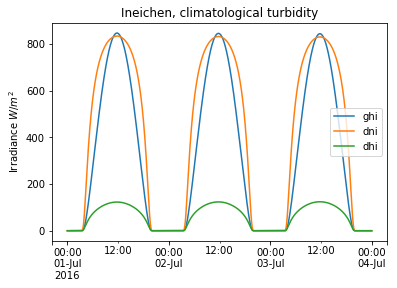

In [85]:
tus = Location(52.8, 4.9)
times = pd.DatetimeIndex(start='2016-07-01', end='2016-07-04', freq='1min', tz=tus.tz)
cs = tus.get_clearsky(times)  # ineichen with climatology table by default
cs.plot()
plt.ylabel('Irradiance $W/m^2$')
plt.title('Ineichen, climatological turbidity')
plt.show()

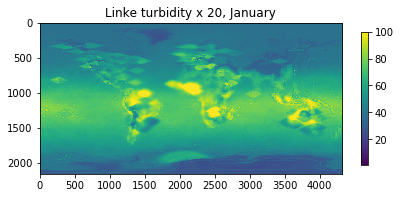

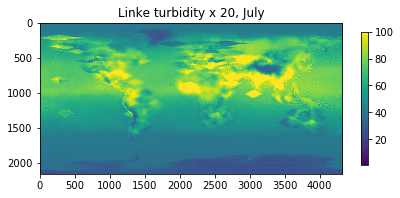

In [86]:
import calendar
import tables

pvlib_path = os.path.dirname(os.path.abspath(pvlib.clearsky.__file__))
filepath = os.path.join(pvlib_path, 'data', 'LinkeTurbidities.h5')

def plot_turbidity_map(month, vmin=1, vmax=100):
        plt.figure();
        with tables.open_file(filepath) as lt_h5_file:
            ltdata = lt_h5_file.root.LinkeTurbidity[:, :, month-1]
        plt.imshow(ltdata, vmin=vmin, vmax=vmax);
        # data is in units of 20 x turbidity
        plt.title('Linke turbidity x 20, ' + calendar.month_name[month]);
        plt.colorbar(shrink=0.5);
        plt.tight_layout();
        plt.show()

plot_turbidity_map(1)
plot_turbidity_map(7)

In [109]:
import datetime
# import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
latitude, longitude, tz = 52.8, 4.9, 'Etc/GMT-1'

# specify time range.
start = pd.Timestamp(datetime.date.today(), tz=tz)
end = start + pd.Timedelta(days=7)
irrad_vars = ['ghi', 'dni', 'dhi']

# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available
model = GFS()

# retrieve data. returns pandas.DataFrame object
raw_data = model.get_data(latitude, longitude, start, end)
print(raw_data.head())

                           Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average  \
2018-12-11 00:00:00+01:00                                               65.0             
2018-12-11 03:00:00+01:00                                               41.0             
2018-12-11 06:00:00+01:00                                               38.0             
2018-12-11 09:00:00+01:00                                               83.0             
2018-12-11 12:00:00+01:00                                               80.0             

                           Wind_speed_gust_surface  \
2018-12-11 00:00:00+01:00                12.948314   
2018-12-11 03:00:00+01:00                12.200586   
2018-12-11 06:00:00+01:00                10.402449   
2018-12-11 09:00:00+01:00                 8.932648   
2018-12-11 12:00:00+01:00                 5.430307   

                           Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average  \
2018-12-11 00:00:00+01:00            